In [1]:
"""

brew install portaudio
pip install pyaudio

"""


'\nTo install pyaudio, I first installed homebrew:\n\nbrew install portaudio\npip install pyaudio\n\n'

In [2]:
import struct
import pyaudio
from scipy.fftpack import fft
import wave
import sys
import os
import numpy as np
import time
from tkinter import TclError
import matplotlib.pyplot as plt
#matplotlib.use("TkAgg")
import multiprocessing
from pylab import get_current_fig_manager


%matplotlib inline

# Part 1 Pyaudio basics: use a class to play a .wav file

In [ ]:

class AudioFile:


    def __init__(self, file):
        """ Initiate audio stream """ 
        self.p = pyaudio.PyAudio()
        self.chunk = 1024*2
        self.channels = 1
        self.format = pyaudio.paInt16
        self.rate = 84100
        self.wf = wave.open(file, 'rb')
        self.p = pyaudio.PyAudio()
        self.stream = self.p.open(
            format = self.format,
            channels = self.channels,
            rate = self.rate,
            output = True
        )

    def play(self):
        """ Play wav file """
        data = self.wf.readframes(self.chunk)
        while data != '':
            self.stream.write(data)
            data = self.wf.readframes(self.chunk)
            data
  
# I'M TRYING TO INCLUDE PLOTTING FUCNTIONS IN THE SAME CLASS - THIS PART DOESN'T WORK
    def init_plots(self):

        # x variables for plotting
        x = np.arange(0, 2 * self.CHUNK, 2)
        xf = np.linspace(0, self.RATE, self.CHUNK)

        # create matplotlib figure and axes
        self.fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))
        self.fig.canvas.mpl_connect('button_press_event', self.onClick)

        # create a line object with random data
        self.line, = ax1.plot(x, np.random.rand(self.CHUNK), '-', lw=2)

        # create semilogx line for spectrum
        self.line_fft, = ax2.semilogx(
            xf, np.random.rand(self.CHUNK), '-', lw=2)

        # format waveform axes
        ax1.set_title('AUDIO WAVEFORM')
        ax1.set_xlabel('samples')
        ax1.set_ylabel('volume')
        ax1.set_ylim(0, 255)
        ax1.set_xlim(0, 2 * self.CHUNK)
        plt.setp(
            ax1, yticks=[0, 128, 255],
            xticks=[0, self.CHUNK, 2 * self.CHUNK],
        )
        plt.setp(ax2, yticks=[0, 1],)

        # format spectrum axes
        ax2.set_xlim(20, self.RATE / 2)

        # show axes
        thismanager = plt.get_current_fig_manager()
        thismanager.window.setGeometry(5, 120, 1910, 1070)
        plt.show(block=False)


    """DOESN'T WORK"""
    
    def start_plot(self):

        frame_count = 0
        start_time = time.time()

        while (time.time() - start_time) < 4:
            data = self.stream.read(self.CHUNK)
            data_int = struct.unpack(str(2 * self.CHUNK) + 'B', data)
            data_np = np.array(data_int, dtype='b')[::2] + 128

            self.line.set_ydata(data_np)

            # compute FFT and update line
            yf = fft(data_int)
            self.line_fft.set_ydata(
                np.abs(yf[0:self.CHUNK]) / (128 * self.CHUNK))

            # update figure canvas
            self.fig.canvas.draw()
            self.fig.canvas.flush_events()
            frame_count += 1
            
        try:
            fig.canvas.draw()
            fig.canvas.flush_events()
            frame_count += 1
        
        except TclError:
        
            # calculate average frame rate
            frame_rate = frame_count / (time.time() - start_time)

            
    

    def close(self):
        """ shutdown """ 
        self.stream.close()
        self.p.terminate()

# Usage example for pyaudio
a = AudioFile("./jello.wav")
a.play()
a.init_plots()
a.start_plot()
a.close()




# Part 2: waveform viewer for live audio

In [3]:


"""streaming data from a microphone in realtime
audio is captured using pyaudio
then converted from binary data to ints using struct
then displayed using matplotlib
"""

# constants
CHUNK = 1024 * 2             # samples per frame
FORMAT = pyaudio.paInt16     # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone
RATE = 44100                 # samples per second
pause = False


stream started


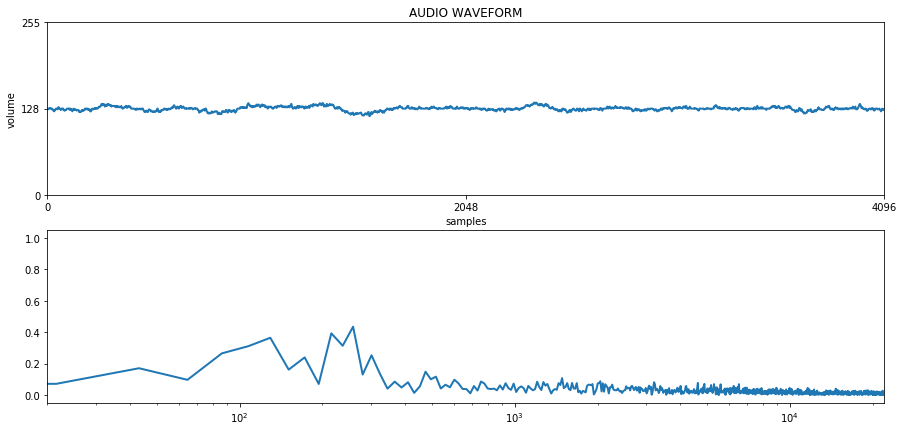

In [7]:
def onClick(event):
    pause = True
      
# create matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))
fig.canvas.mpl_connect('button_press_event', onClick)


# pyaudio class instance
p = pyaudio.PyAudio()

# stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

# variable for plotting
x = np.arange(0, 2 * CHUNK, 2)       # samples (waveform)


xf = np.linspace(0, RATE, CHUNK)     # frequencies (spectrum)-goes from 0 to rate, chunk-number of points

# create a line object with random data
line, = ax1.plot(x, np.random.rand(CHUNK), '-', lw=2)

# create the same semilogx line for spectrum
line_fft, = ax2.semilogx(xf, np.random.rand(CHUNK), '-', lw=2)

#  format waveform axes
ax1.set_title('AUDIO WAVEFORM')
ax1.set_xlabel('samples')
ax1.set_ylabel('volume')
ax1.set_ylim(0, 255)
ax1.set_xlim(0, 2 * CHUNK)
plt.setp(ax1, xticks=[0, CHUNK, 2 * CHUNK], yticks=[0, 128, 255])

# format spectrum axes
ax2.set_xlim(20, RATE / 2)

print('stream started')

# for measuring frame rate
frame_count = 0
start_time = time.time()

while (time.time() - start_time) < 4:
    # not pause:
#     print((time.time() - start_time))
    
# binary data
#     data = stream.read(CHUNK)
    data = stream.read(CHUNK, exception_on_overflow = False)
    
    
    # convert data to integers, make np array
    data_int = struct.unpack(str(2 * CHUNK) + 'B', data)
    
    # create np array and offset by 128
    data_np = np.array(data_int, dtype='b')[::2] + 128
    
    line.set_ydata(data_np)
    
    # fast fourier tranformation and update line
    yf = fft(data_int)
    line_fft.set_ydata(np.abs(yf[0:CHUNK])  / (128 * CHUNK))
    
    # update figure canvas
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame_count += 1
        
    except TclError:
        
        # calculate average frame rate
        frame_rate = frame_count / (time.time() - start_time)
        
        print('stream stopped')
        print('average frame rate = {:.0f} FPS'.format(frame_rate))
        break
